In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to read data and compute CDF using pandas
def read_and_compute(filename):
    # Read data into a pandas Series
    data = pd.read_csv(filename, header=None, names=['latency'])
    # Sort the data
    data_sorted = data.sort_values(by='latency')
    # Compute CDF
    cdf = data_sorted.rank(method='average', pct=True)

    percentiles = [0.5, 0.9, 0.99]
    data_percentiles = data.quantile(percentiles)
    return data_sorted, cdf, data_percentiles

In [2]:
# Load and compute CDFs
base_dir = "/home/svilen-mihaylov/temp/rl/results/r3"
experiment = "n1_size10000_updates500"

model1_latencies, model1_cdf, model1_pct = read_and_compute("%s/tag_%s_%s_latencies.txt" % (base_dir, "model1", experiment))
model2_latencies, model2_cdf, model2_pct = read_and_compute("%s/tag_%s_%s_latencies.txt" % (base_dir, "model2", experiment))
pid_latencies, pid_cdf, pid_pct = read_and_compute("%s/tag_%s_%s_latencies.txt" % (base_dir, "pid", experiment))
no_pid_latencies, no_pid_cdf, no_pid_pct = read_and_compute("%s/tag_%s_%s_latencies.txt" % (base_dir, "vanilla", experiment))

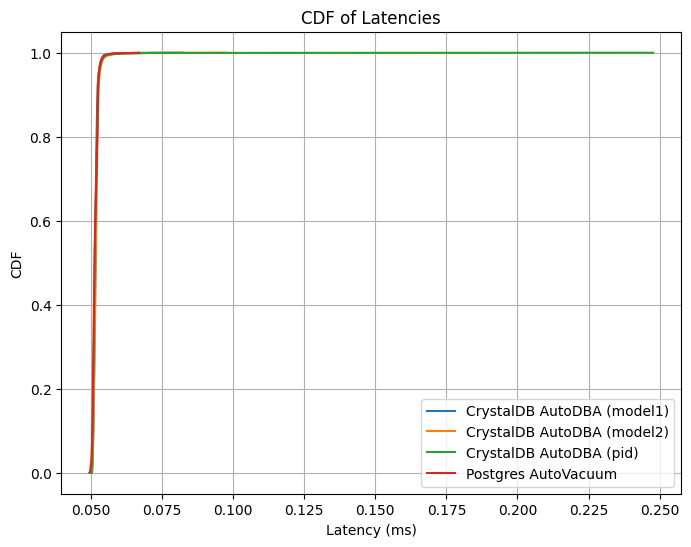

In [3]:
# Plot
plt.figure(figsize=(8, 6))
plt.plot(model1_latencies, model1_cdf, label='CrystalDB AutoDBA (model1)')
plt.plot(model2_latencies, model2_cdf, label='CrystalDB AutoDBA (model2)')
plt.plot(pid_latencies, pid_cdf, label='CrystalDB AutoDBA (pid)')
plt.plot(no_pid_latencies, no_pid_cdf, label='Postgres AutoVacuum')
plt.xlabel('Latency (ms)')
plt.ylabel('CDF')
plt.title('CDF of Latencies')
plt.legend()
plt.grid(True)
plt.show()

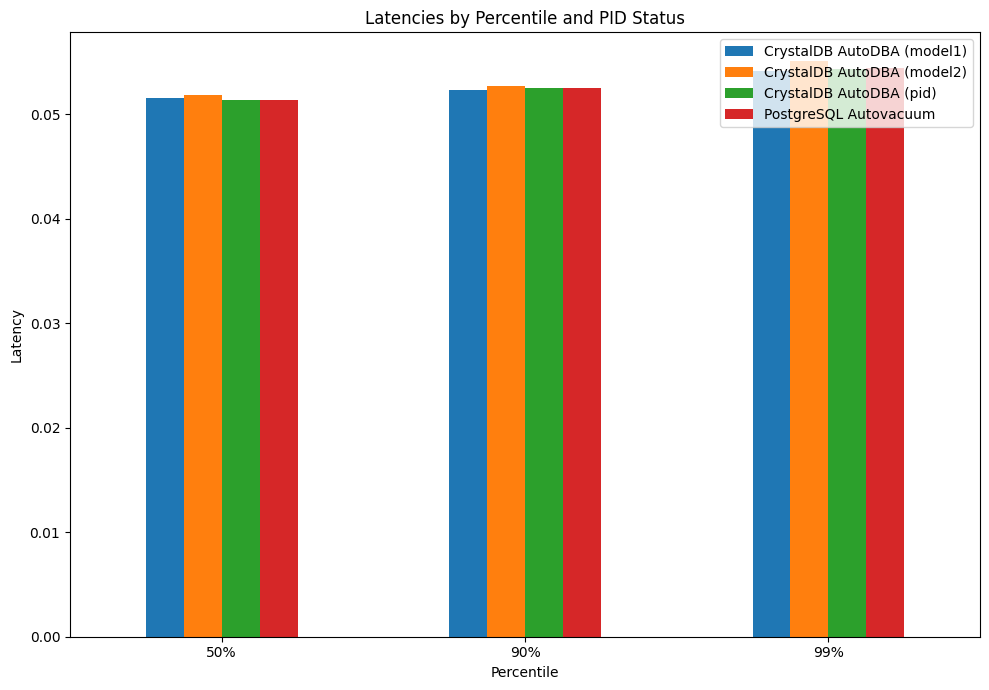

In [4]:
combined_percentiles = pd.DataFrame({
    'CrystalDB AutoDBA (model1)': model1_pct.values.flatten(),
    'CrystalDB AutoDBA (model2)': model2_pct.values.flatten(),
    'CrystalDB AutoDBA (pid)': pid_pct.values.flatten(),
    'PostgreSQL Autovacuum': no_pid_pct.values.flatten()
}, index=['50%', '90%', '99%'])

# Plotting
combined_percentiles.plot(kind='bar', figsize=(10, 7))

plt.title('Latencies by Percentile and PID Status')
plt.xlabel('Percentile')
plt.ylabel('Latency')
plt.xticks(rotation=0)  # Keep the percentile labels horizontal for readability
plt.legend()
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()
